# Bootcamp Final
- Sam Anderson
- 9-13-19

**Import Python Packages and Get Data**

In [76]:
import os
import numpy as np
import urllib.request
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [77]:
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12835340", 
                           filename = "CA_fires_1992_2015_gt_100_acres.csv")

ca_fires = pd.read_csv("C:/Users/Sam/earth-analytics-bootcamp/CA_fires_1992_2015_gt_100_acres.csv")

**Question 1: Explore Structure of the Pandas Dataframe (2 pts)**
- Use the appropriate functions to print the first few rows of the pandas dataframe and the last few rows of the dataframe.

Note: as this dataframe contains many records, it is not helpful to print the whole dataframe.

In [78]:
ca_fires.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,120.0,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,1800.0,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,4200.0,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,125.0,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,104.0,D,CA,NaN


In [79]:
ca_fires.tail()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
4096,300308392,Butte Unit,RICHVALE,2015,October,10,Equipment Use,250.0,D,CA,Butte
4097,300308084,CDF - San Benito-Monterey Unit,CIENEGA,2015,October,10,Miscellaneous,690.0,E,CA,San Benito
4098,300209443,Sequoia And Kings Canyon National Parks,BURNT,2015,October,10,Lightning,161.0,D,CA,NaN
4099,300293910,Colorado River Agency,HIGHWAY,2015,November,11,Missing/Undefined,323.0,E,CA,Riverside
4100,300293894,Ventura County Fire Department,SOLIMAR,2015,December,12,Missing/Undefined,1288.0,F,CA,Ventura


**Question 2: Summarize Fire Size (4 pts)**
- Use the appropriate function to calculate summary statistics of only the fire size (acres).
- In your Markdown documentation for this question, write a sentence or two stating:
   - the mean, minimum, and maximum fire size (acres) in this dataset.
   - the total number of fires in this dataset.
- Hints:
It can helpful to determine how to select the data you need first before summarizing it.
You can also review how to run summary statistics on a specific column in a pandas dataframe.

In [80]:
ca_fires.fire_size.describe()

count      4101.000000
mean       2995.314133
std       13481.045403
min         100.100000
25%         180.000000
50%         354.000000
75%        1155.000000
max      315578.800000
Name: fire_size, dtype: float64

**Question 3: Calculate Total Number of Fires For Each Year (4 pts)**
- Use the appropriate function to calculate the total number of fires per year, and save as a new dataframe.
- Note: the displayed data below only shows the first few rows in the dataset.
- Hints: Review the use of groupby to run statistics on pandas dataframes.
Think about what value you want to use to group the data and what value you want to use to determine the total number of fires.


In [81]:
ca_f_group = ca_fires.groupby(['year'])[["fd_unq_id"]].count()
print(ca_f_group)

      fd_unq_id
year           
1992        237
1993        187
1994        201
1995        189
1996        333
1997        143
1998        135
1999        219
2000        113
2001        149
2002        167
2003        210
2004        147
2005        171
2006        235
2007        160
2008        281
2009        120
2010         94
2011        139
2012        127
2013        122
2014         90
2015        132


**Question 4: Reset Index (2 pts)**
- Use the appropriate function to reset the index of the dataframe created in the previous question, so that the year returns to being a column. Save the reset dataframe as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

In [82]:
ca_f_reset = ca_f_group.reset_index()
print(ca_f_reset)

    year  fd_unq_id
0   1992        237
1   1993        187
2   1994        201
3   1995        189
4   1996        333
5   1997        143
6   1998        135
7   1999        219
8   2000        113
9   2001        149
10  2002        167
11  2003        210
12  2004        147
13  2005        171
14  2006        235
15  2007        160
16  2008        281
17  2009        120
18  2010         94
19  2011        139
20  2012        127
21  2013        122
22  2014         90
23  2015        132


**Question 5: Plot Total Number of Fires For Each Year (2 pts)**
- Create a plot of your choice (i.e. type, color) that displays the total number of fires for each year of data.
- Be sure to label your x- and y-axes appropriately and give your plot an appropriate title.

Hint:

Think about which dataframe you want to use for the plot and what data you need to plot.

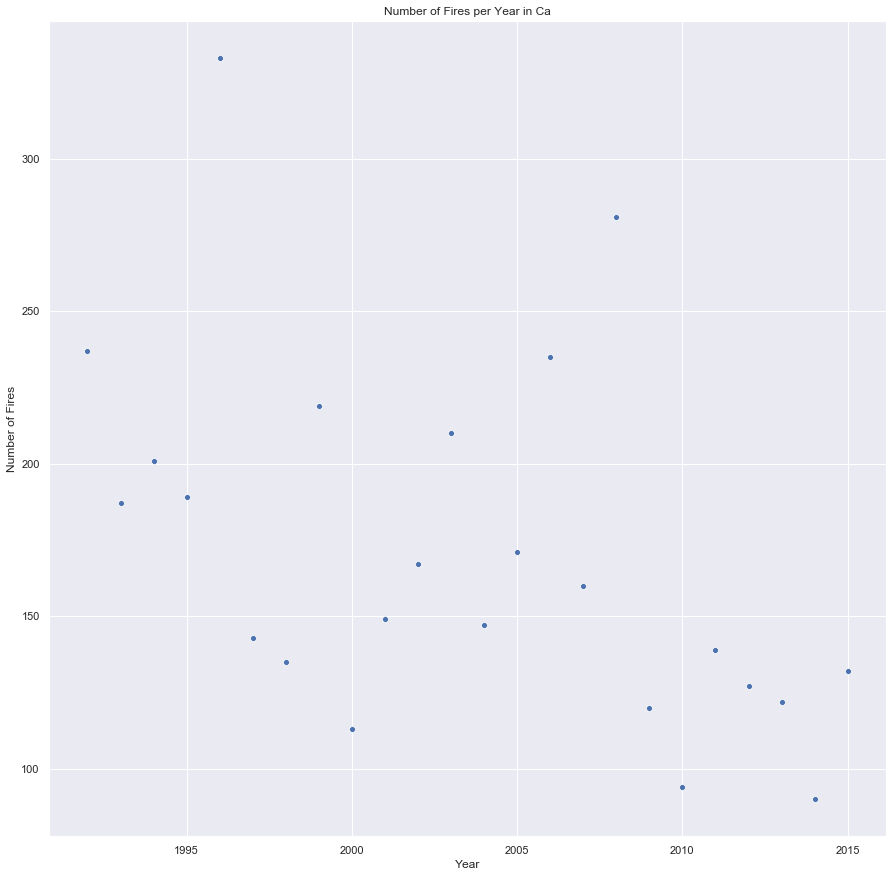

In [83]:

sns.set()
fig, ax = plt.pyplot.subplots()
sns.scatterplot(x='year', y='fd_unq_id', data=ca_f_reset)    
fig.set_size_inches(15,15)
ax.set(title="Number of Fires per Year in Ca")
ax.set(xlabel="Year", ylabel="Number of Fires");

**Question 6: Convert Units For Fire Size (4 pts)**
- Write a function to convert the units of fire size from acres to hectares (i.e. a standard unit that represents 10,000 square meters). One hectare is equal to 2.47105 acres.

In [84]:
def con_to_hec(x):
    return (x / 2.47105)

**Question 7: Apply Function to Column (4 pts)**
- Run the function you created in the previous question to convert the units of the fire size in your pandas dataframe from acres to hectares.
- Use the appropriate function to print only the first few rows to display the converted data.

Hint:

Review how to apply a function to a column in a pandas dataframe.

In [85]:
#column name is fire_size, array is ca_fires
hec_firesize = con_to_hec(ca_fires.fire_size)
hec_firesize.head()

0      48.562352
1     728.435281
2    1699.682321
3      50.585783
4      42.087372
Name: fire_size, dtype: float64

**Question 8: Calculate Mean Fire Size For Each Year (4 pts)**
- Use the appropriate function to calculate the mean fire size (in hectares) per year and save as a new dataframe.

Hints:

Review the use of groupby to run statistics on pandas dataframes.
Think about what value you want to use to group the data and what value you want to use to determine the mean size of fires.

In [86]:
ca_f_avg = ca_fires.groupby(['year'])[["fire_size"]].mean()
hec_firemean = con_to_hec(ca_f_avg.fire_size)
print(hec_firemean)

year
1992     461.297265
1993     642.637897
1994     771.721812
1995     417.441164
1996     825.744342
1997     863.506539
1998     429.523812
1999    1448.977701
2000     854.639021
2001     900.335958
2002    1200.760616
2003    1949.024754
2004     774.053581
2005     568.532850
2006    1362.305007
2007    2587.639263
2008    2029.355452
2009    1484.785145
2010     460.182574
2011     508.914263
2012    2387.130276
2013    1865.413123
2014    2409.864902
2015    2560.837008
Name: fire_size, dtype: float64


**Question 9: Plot Mean Fire Size For Each Year (2 pts)**
- Create a plot of your choice (i.e. type, color) that displays the mean size of fires for each year of data.
- Be sure to label your x- and y-axes appropriately and give your plot an appropriate title.

Hint:

Recall the step you completed in Question 4 to reset the index after the groupby.
Think about which dataframe you want to use for the plot and what data you need to plot.


sns.set()
fig, ax = plt.pyplot.subplots()
sns.scatterplot(x='year', y='fire_size', data=hec_firemean)    
fig.set_size_inches(15,15)
ax.set(title="Number of Fires per Year in Ca")
ax.set(xlabel="Year", ylabel="Number of Fires");

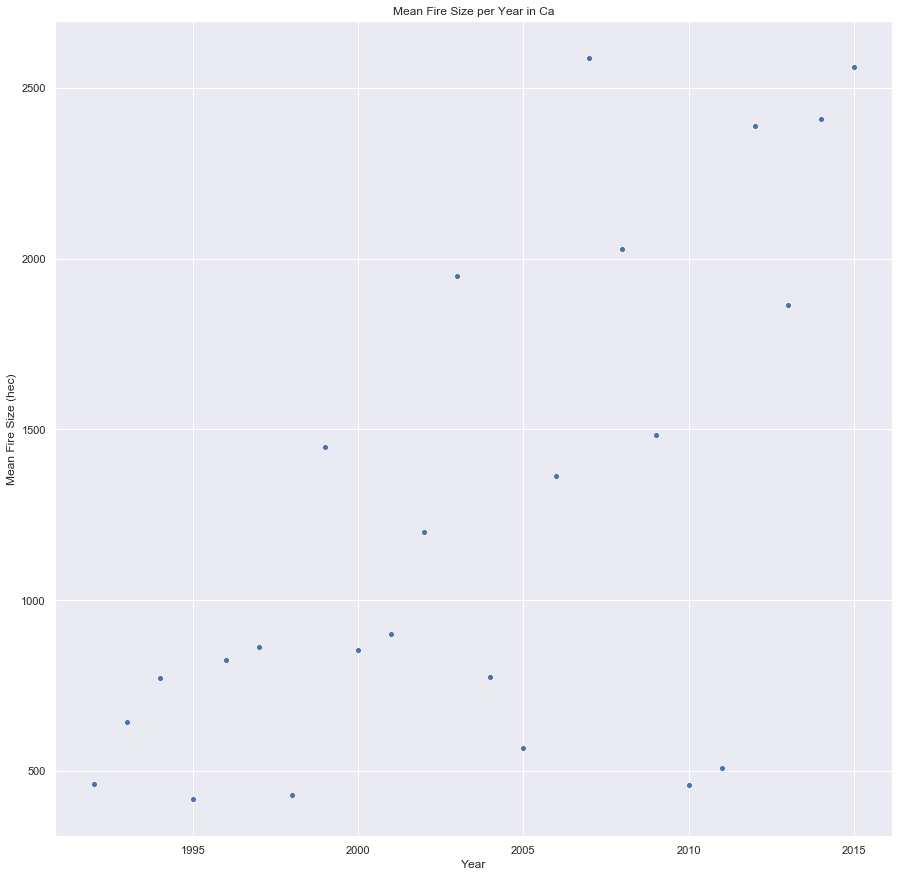

In [87]:
hec_firemean_reset = hec_firemean.reset_index()


sns.set() 
fig, ax = plt.pyplot.subplots() 
sns.scatterplot(x='year', y='fire_size', data=hec_firemean_reset)
fig.set_size_inches(15,15) 
ax.set(title="Mean Fire Size per Year in Ca") 
ax.set(xlabel="Year", ylabel="Mean Fire Size (hec)");

**Question 10: Discuss Results (4 pts)**

Write a few sentences (2-3) on each of the following:
- Do the number of fires appear to be increasing over time in California? Explain and support your answer using your plot of total number of fires per year.
- Does the average size of fires appear to be increasing over time in California? Explain and support your answer using your plot of mean size of fires per year.
- Which result (i.e. total number of fires or mean fire size per year) do you think provides a more appropriate measure of fire danger in California?



- The number of fires does not seem to be increasing, it almost seems to be descreasing.
- Yes, the mean fire size is increasing over time.
- I think a combination of the two is probably most representative.  Many other variables could be used to determine areas at greater fire risk.

**Get Data**
- Use .urllib.request to download the following .csv file of the number of fires by month and year in California and import the data to numpy arrays:
- CA-fires-month-count-1992-to-2015.csv from https://ndownloader.figshare.com/files/12835346
- The dataset contains a row for each year specified in the dataset name and contains a column for each month (starting with January through December). The values represent the number of fires that occurred in that month and year, based on fires greater than 100 acres that occurred between 1992 and 2015.

In [88]:
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12835346", 
                           filename = "CA-fires-month-count-1992-to-2015.csv")

fires_92to15 = np.loadtxt("CA-fires-month-count-1992-to-2015.csv", delimiter=',')

print(fires_92to15)

[[  0.   1.   1.   5.  23.  55.  42.  66.  34.   6.   4.   0.]
 [  0.   0.   0.   2.  27.  44.  33.  30.  23.  17.   9.   2.]
 [  2.   0.   0.   6.   8.  50.  48.  55.  23.   8.   0.   1.]
 [  0.   1.   0.   0.  11.  25.  53.  35.  25.  25.  11.   3.]
 [  2.   0.   1.  15.  39.  64.  64.  93.  25.  26.   3.   1.]
 [  0.   0.   5.   7.  28.  13.  29.  28.  25.   7.   1.   0.]
 [  0.   0.   0.   2.   2.  12.  33.  47.  16.  14.   5.   4.]
 [  0.   2.   2.   3.   7.  19.  33.  89.  37.  22.   3.   2.]
 [  0.   0.   3.   3.   5.  19.  31.  22.  17.  10.   0.   3.]
 [  2.   1.   1.   0.  13.  37.  30.  40.  14.   7.   3.   1.]
 [  0.   4.   7.   3.  19.  42.  34.  21.  20.   6.  11.   0.]
 [  3.   1.   0.   2.   5.  33.  63.  32.  47.  22.   2.   0.]
 [  0.   1.   1.   7.  16.  21.  39.  27.  27.   7.   1.   0.]
 [  0.   0.   0.   2.   5.  28.  47.  27.  43.  15.   4.   0.]
 [  1.   2.   0.   0.  17.  50.  96.  29.  21.  11.   5.   3.]
 [  3.   1.   8.   4.  21.  23.  31.  30.  11.  25.   3

**Question 11: Write Function to Calculate Sum Across Columns (4 pts)**
- Write a function that calculates the sum across columns of a numpy array.

Hints:

Recall which existing numpy function you can use to calculate a sum. You will include this function within the function you write to answer this question.
Review the lessons on functions to review the use of axes to calculate a statistic across the rows or columns of a numpy array.


In [89]:
def col_sum(array):
    return array.sum(axis = 0)


**Question 12: Execute Function to Calculate Sum Across Columns (2 pts)**
- Run the function created in the previous question (i.e. to calculate sum across columns in a numpy array) on the numpy array you created for CA-fires-month-count-1992-to-2015.csv. Save the output to a new numpy array.

In [90]:
csum_fires = col_sum(fires_92to15)
print(csum_fires)

[ 21.  22.  36.  89. 338. 816. 968. 909. 521. 275.  82.  24.]


**Question 13: Write Function to Calculate Sum Across Rows (4 pts)**

Write a function that calculates the sum across rows of a numpy array.

Hints:

Recall which existing numpy function you can use to calculate a sum. You will include this function within the function you write to answer this question.
Review the lessons on functions to review the use of axes to calculate a statistic across the rows or columns of a numpy array.

In [91]:
def row_sum(array):
    return array.sum(axis = 1)

**Question 14: Execute Function to Calculate Sum Across Rows (2 pts)**

Run the function created in the previous question (i.e. to calculate sum across rows in a numpy array) on the numpy array you created for CA-fires-month-count-1992-to-2015.csv. Save the output to a new numpy array.

In [92]:
sumrows = row_sum(fires_92to15)
print(sumrows)


[237. 187. 201. 189. 333. 143. 135. 219. 113. 149. 167. 210. 147. 171.
 235. 160. 281. 120.  94. 139. 127. 122.  90. 132.]


**Question 15: Create Manual Numpy Array (2 pts)**
- Manually create a numpy array that contains the month names for January to December and print the values in this new numpy array.

Hints:

Review the practice activity on data structures to review how to create a numpy array manually.
Think about the values that are going into this array: are the values text strings or numeric values?


In [93]:
month_array = np.array(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"])
print(month_array)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']


**Question 16: Check Dimensions of Numpy Arrays (4 pts)**
- Write one conditional statement that checks that the dimensions (i.e. shape) are the same between:
  - The numpy array for the sum across columns and the numpy array containing the month names AND
  - The numpy array for the sum across rows and the numpy array containing the month names 
  - Within your conditional statement, print a message stating whether or not both of these conditions are true.

Hint:

Compare the shape of the arrays, rather than the single value for the dimension.
Recall the operator to check equality between two values.
Review how to write a conditional statement that checks for two conditions.

In [94]:

ma = month_array.shape 
sr = sumrows.shape
sc = csum_fires.shape
 

if ma == sr == sc:
    print("The dimensions are the same")
else:
    print("The dimensions are NOT the same")

The dimensions are NOT the same


**Question 17: Plot Numpy Array (6 pts)**

Imagine that you have been asked to write a short article for the public on the fire season (i.e. the range of time within a year in which fire is most likely to occur) in California.

Review the data in your summarized numpy arrays (i.e. sum of columns and sum of rows), and choose the one of these arrays to create to represent the fire season in California.

For your chosen array, create a plot of your choice (i.e. type, color). Be sure to label your x- and y-axes appropriately and to give your plots the approriate titles.

In your Markdown documentation, write a few sentences (1-2) to answer each of the following:

- What do the values in each of these numpy arrays (i.e. the one for sum of columns and the one for sum of rows) represent?

- Why did you choose the array that you plotted to represent the fire season in California?

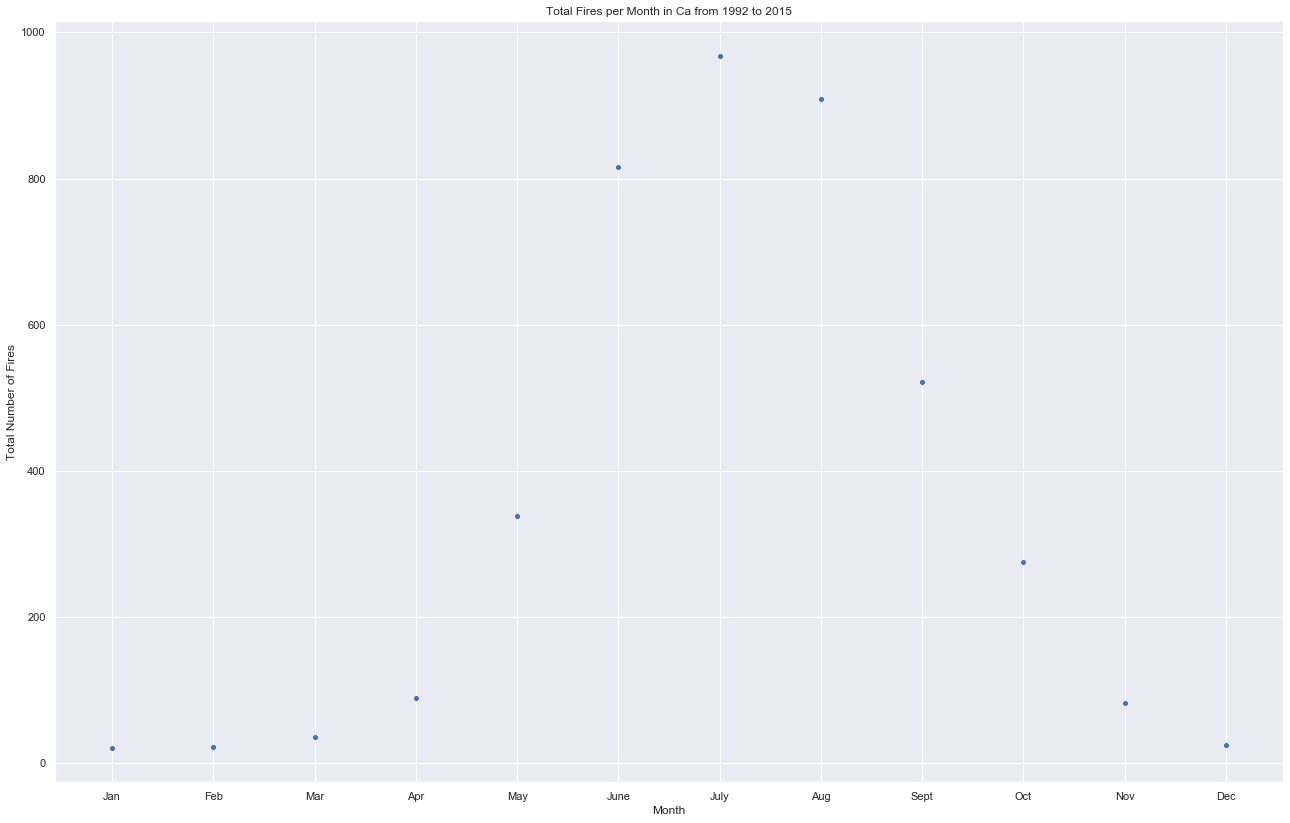

In [95]:
sns.set()
fig, ax = plt.pyplot.subplots()
sns.scatterplot(x=month_array, y=csum_fires)  
fig.set_size_inches(22,14)
ax.set(title="Total Fires per Month in Ca from 1992 to 2015")
ax.set(xlabel="Month", ylabel="Total Number of Fires");

- The sum of columns array is the total amount of fires that happened from 1992 to 2015 per month.  The sum of rows array demonstrates the total number of fires that happened in each of the aforementioned years.
- I choose to plot the column array because I was asked to demonstrate the correlation between seasonality and number of fires.

**Question 18: Discuss Results (6 pts)**
- Write a few sentences (1-2) on each of the following:
   - Based on the data you have analyzed, how would you define the fire season (i.e. the range of time within a year in which fire is most likely to occur) in California?
   - How could you modify your workflow to examine whether the fire season was expanding over time? Think about how the data is organized and how you could split it up to look at how the fire season was changing over time.



- I would define fire seasons as May to October based on the data which is plotted in question 17.
- I could generate another plot which demonstrates yearly number of fires to determine if the total amount of fires was increasing per year.  Both of these plots lack relevant information with regards to potential risk.  I believe that fire size would also need to be taken into consideration as well as amount of time the fires burned for.

**Question 19: Discuss Pandas Dataframes vs Numpy Arrays (6 pts)**
    
In the numpy array section, you calculate the sum across columns. Write a short paragraph (3-4 sentences and include a list if desired) on the following:

How could you have analyzed the pandas dataframe to get the same values? Outline a pandas dataframe workflow to arrive at the same values.
Hint: think about the data provided in the original numpy array - do you have similar information in the pandas dataframe?

- There is not enought information to answer thiis question- I would need to know if the array would be exactly the same or if either the columns, rows, or both have labels as a panda.  If the panda was the exact same then I would use the same workflow.

**Question 20: Calculate Number of Fires By County (4 pts)**

Use the appropriate function to calculate the total number of fires per county and save as a new dataframe.

Hints:

Review the use of groupby to run statistics on pandas dataframes.
Think about what value you want to use to group the data and what value you want to use to determine the total number of fires.

In [96]:
ca_fires.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,120.0,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,1800.0,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,4200.0,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,125.0,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,104.0,D,CA,NaN


In [97]:
fire_group_county = ca_fires.groupby(['county'])[['fd_unq_id']].count()
fire_group_county.head()

,fd_unq_id
county,
Alameda,7
Alpine,5
Amador,3
Butte,35
Calaveras,13


**Question 21: Determine Top 5 Counties for Number of Fires (4 pts)**
- Sort your pandas dataframe from the previous question, so that you can determine the top five counties that have experienced the most fires.
- In your Markdown documentation, answer the following question:  In what part of California are these counties? It can help to look at a map of the counties in California.

In [98]:
fire_group_county.sort_values(by="fd_unq_id", ascending = False)

,fd_unq_id
county,
Kern,91
San Diego,85
Riverside,80
San Bernardino,65
Los Angeles,63
Lassen,59
Siskiyou,58
Trinity,56
Shasta,47


The top five counties are in Southern Ca.

**Question 22: Calculate Mean Size of Fire By County (4 pts)**
- Use the appropriate function to calculate the mean size of fires (in hectares) per county and save as a new dataframe.

Hints:

Review the use of groupby to run statistics on pandas dataframes.
Think about what value you want to use to group the data and what value you want to use to determine the mean size of fires.


In [99]:
b = ca_fires.groupby(['county'])[['fire_size']].mean()

b.head()

,fire_size
county,
Alameda,322.000000
Alpine,4065.600000
Amador,5787.666667
Butte,1224.714286
Calaveras,254.307692


In [100]:
fire_hec = con_to_hec(b)
fire_hec.head()

,fire_size
county,
Alameda,130.308978
Alpine,1645.292487
Amador,2342.189218
Butte,495.625052
Calaveras,102.914831


**Question 23: Select Data for Top 3 Counties for Mean Size of Fire and Create New Dataframes (4 pts)**
- Sort your pandas dataframe from the previous question, so that you can determine the top three counties ranked in terms of largest mean fire size.
- For each of these counties, select all of its data from the original pandas dataframe from CA_fires_1992_2015_gt_100_acres.csv, and save each county to a new dataframe.

In [101]:
fire_hec.sort_values(by="fire_size", ascending = False)

,fire_size
county,
Ventura,12521.038065
Santa Clara,8244.673317
Santa Barbara,6758.735725
Monterey,5522.676402
Tuolumne,4448.036260
Trinity,4193.042793
Siskiyou,3663.549420
Colusa,3534.192617
Lassen,3312.783731


In [102]:
ca_fires.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,120.0,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,1800.0,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,4200.0,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,125.0,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,104.0,D,CA,NaN


In [128]:
#The tutorial that explains how to do this is wrong.  

ventura = ca_fires.groupby(ca_fires.county == 'Ventura')
santa_clara = ca_fires.groupby(ca_fires.county == 'Santa Clara')
santa_barbara = ca_fires.groupby(ca_fires.county == 'Santa Barbara')

ventura.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,120.0,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,1800.0,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,4200.0,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,125.0,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,104.0,D,CA,NaN
2265,1301190,Ventura County Fire Department,SIMI INCIDENT,2003,October,10,Missing/Undefined,108204.0,G,CA,Ventura
2597,15001173,Cal state responsibility area (SRA) in Ventura...,SCHOOL,2005,November,11,Missing/Undefined,3891.0,F,CA,Ventura
2807,14907,Los Padres National Forest,DAY,2006,September,9,Debris Burning,162702.0,G,CA,Ventura
3328,38069,Los Padres National Forest,SULPHUR,2009,July,7,Miscellaneous,343.0,E,CA,Ventura
3355,39373,Los Padres National Forest,VINTAGE,2009,August,8,Miscellaneous,150.0,D,CA,Ventura


**Question 24: Loop to Describe Fire Size in Selected Counties (4 pts)**
- Write a loop that executes the appropriate function to calculate summary statistics of only the fire size (acres) for each of the three counties identified in the previous question.

- In your Markdown documentation for this question, write a sentence or two stating the total number of fires for each county.

Hints:

- Review your code from Question 2.
- Recall that creating a list of items to iterate upon is a good first step to writing a loop.
- Think about what you are iterating upon in this question - do your list values need "" to indicate text strings, or are you iterating on existing variables?

In [135]:
list = [ventura, santa_clara, santa_barbara]

for array in list:
    g = array.fire_size.describe()
    print(g)
 


         count          mean           std    min    25%    50%      75%  \
county                                                                     
False   4092.0   2933.851970  13159.995258  100.1  180.0  352.5  1151.75   
True       9.0  30940.111111  60809.905754  150.0  343.0  912.0  3891.00   

             max  
county            
False   315578.8  
True    162702.0  
         count          mean           std    min     25%      50%      75%  \
county                                                                        
False   4097.0   2978.347879  13462.713505  100.1   180.0    352.0   1151.0   
True       4.0  20373.000000  22664.048903  435.0  2454.0  16648.5  34567.5   

             max  
county            
False   315578.8  
True     47760.0  
         count          mean           std    min    25%    50%     75%  \
county                                                                    
False   4078.0   2918.012815  12920.777976  100.1  180.0  351.0  1150.0   
T

Santa Barbara county had the most fires, 23, followed by Ventura county with 9 and Santa Clara county with 4.